In [1]:
# Librerías manejo de datos
import numpy as np
import pandas as pd

# Librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos y ETL

Vamos a cargar un dataset sobre el peso de los niños al nacer.


In [2]:
#birth_weight = pd.read_csv('birthweight.csv')
birth_weight = pd.read_csv('https://github.com/calabozo/orange-stats/raw/master/birthweight.csv')

In [3]:
birth_weight.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [4]:
birth_weight["Birthweight_kg"]=birth_weight["Birthweight"]*0.453592

### Media

\\[ \mu_{x} = E[x] =  \frac{1}{N} \sum _{i=1}^N x_i\\]

Rellenar con formula y texto

In [5]:
def mean(vector):
    m = 0
    for val in vector:
        m = val+m
    m = m/len(vector)
    return m
mean(birth_weight["Birthweight_kg"])

3.2950218857142866

In [6]:
np.mean(birth_weight["Birthweight_kg"])

3.295021885714286

### Varianza

Es la esperanza del cuadrado de la desviación de dicha variable respecto a su media. Otra definición es la media de los residuos al cuadrado.

Su formula es:

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]

Pero como no sabremos $\bar{x}$ sino que siempre tendremoso que estimar la media E[x] la formula del estimador insesgado de la varianza para una muestra de la población es:

\\[ Var[x] =  \frac{1}{N-1} \sum _{i=1}^N \left( x_i-E[x] \right)^2 \\]


In [7]:
def var(vector):
    m = mean(vector)
    v = 0
    for val in vector:
        v = (val-m)**2 + v
    v = v/(len(vector)-1)
    return v
var(birth_weight["Birthweight_kg"])

0.363800698111214

In [8]:
np.var(birth_weight["Birthweight_kg"],ddof=1)

0.36380069811121396

### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [9]:
def median(vector: pd.Series) -> float:
    vector = vector.sort_values()
    idx=(len(vector)-1)/2
    if idx==int(idx):
        return vector.iloc[int(idx)]
    else:
        return (vector.iloc[int(np.floor(idx))]+vector.iloc[int(np.ceil(idx))])/2
    
print(median(pd.Series([1,2,3,3.5,4,6])))
print(median(pd.Series([1,2,3,4,6])))


3.25
3


In [10]:
median(birth_weight["Birthweight_kg"])

3.288542

In [11]:
np.median(birth_weight["Birthweight_kg"])

3.288542

### Cuantiles

Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

* Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los deciles, que dividen a la distribución en diez partes;
* Los percentiles, que dividen a la distribución en cien partes.


In [12]:
np.quantile(birth_weight["Birthweight_kg"],[0.25,0.5,0.75])

array([2.9256684, 3.288542 , 3.628736 ])

### Boxplot

<AxesSubplot:xlabel='Birthweight_kg'>

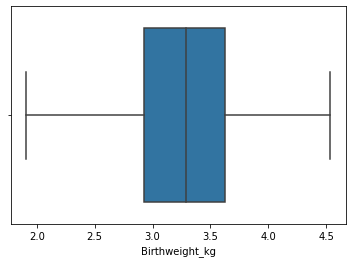

In [13]:
sns.boxplot(x=birth_weight["Birthweight_kg"])

### Histograma

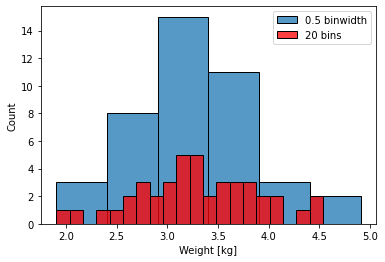

In [14]:
sns.histplot(birth_weight["Birthweight_kg"], binwidth=0.5,label="0.5 binwidth")
sns.histplot(birth_weight["Birthweight_kg"], bins=20,color="red",label="20 bins")
plt.xlabel("Weight [kg]")
plt.legend()

### Curva de densidad (kernel density estimation)

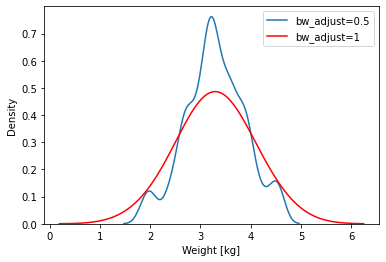

In [15]:
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=0.5,label="bw_adjust=0.5")
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=2,color="red",label="bw_adjust=1")
plt.xlabel("Weight [kg]")
plt.legend()

### Violin plot

<AxesSubplot:xlabel='Birthweight_kg'>

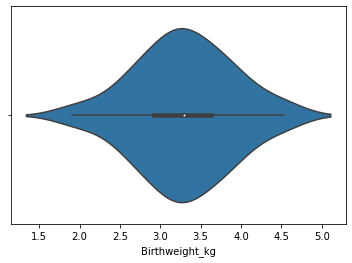

In [16]:
sns.violinplot(data=birth_weight,x="Birthweight_kg")

# Tests estadísticos

¿Es la media de estas dos poblaciones iguales?

In [17]:
weight_NO_smoke = birth_weight.loc[birth_weight["smoker"]==0,"Birthweight_kg"]
weight_YES_smoke = birth_weight.loc[birth_weight["smoker"]==1,"Birthweight_kg"]

In [18]:
weight_NO_smoke.describe()

count    20.000000
mean      3.488122
std       0.520701
min       2.630834
25%       3.118445
50%       3.356581
75%       3.900891
max       4.535920
Name: Birthweight_kg, dtype: float64

In [19]:
weight_YES_smoke.describe()

count    22.000000
mean      3.119476
std       0.630217
min       1.905086
25%       2.721552
50%       3.175144
75%       3.526678
max       4.535920
Name: Birthweight_kg, dtype: float64

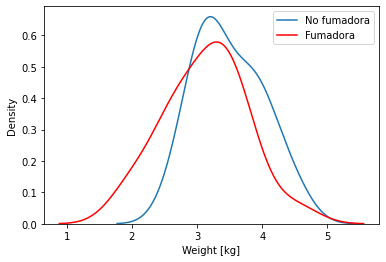

In [20]:
sns.kdeplot(weight_NO_smoke,label="No fumadora")
sns.kdeplot(weight_YES_smoke,color="red",label="Fumadora")
plt.xlabel("Weight [kg]")
plt.legend()

In [21]:
diff_NO_YES=np.mean(weight_NO_smoke.values)-np.mean(weight_YES_smoke.values)
diff_YES_NO=np.mean(weight_YES_smoke.values)-np.mean(weight_NO_smoke.values)
print(f"La diferencia de medias NO_smoker-YES_smoker es:{np.round(diff_NO_YES,2)}")
print(f"La diferencia de medias YES_smoker-NO_smoker es:{np.round(diff_YES_NO,2)}")

La diferencia de medias NO_smoker-YES_smoker es:0.37
La diferencia de medias YES_smoker-NO_smoker es:-0.37


¿Cómo de probable es que estos cambios hayan ocurrido al azar?

In [22]:

X1=weight_NO_smoke
X2=weight_YES_smoke

def perm_func(X1: pd.Series, X2:pd.Series) -> (pd.Series,pd.Series): 
    X = X1.append(X2).reset_index(drop=True)

    X1_reorder=X.sample(frac=0.5)
    X2_reorder=X.drop(X1_reorder.index)
    return (X1_reorder.reset_index(drop=True),X2_reorder.reset_index(drop=True))

X1_reorder, X2_reorder= perm_func(weight_NO_smoke,weight_YES_smoke)

In [23]:
mean_values = []
num_mean_X1_larger_X2 = 0
num_mean_X2_larger_X1 = 0

total_trials = 10000
for i in range(total_trials):
    X1_reorder, X2_reorder= perm_func(weight_NO_smoke,weight_YES_smoke)
    
    mean_diff = np.mean(X1_reorder.values) - np.mean(X2_reorder.values)
    mean_values.append(mean_diff)
    
    if mean_diff>diff_NO_YES:
        num_mean_X1_larger_X2 += 1
    
    if mean_diff<diff_YES_NO:
        num_mean_X2_larger_X1 += 1
    


In [24]:
print(f"""La probabilidad por puro azar la media de X1 menos X2 sea mayor que la diferencia original: 
    {np.round(num_mean_X1_larger_X2/total_trials*100,2)}%""")

print(f"""La probabilidad por puro azar la media de X1 menos X2 sea menor que la diferencia original: 
    {np.round(num_mean_X2_larger_X1/total_trials*100,2)}%""")

print(f"""La probabilidad de que por puro azar los valores de NO_smoker y YES_smoker se hayan reordenado
para dar diferencias tan grandes es:{np.round((num_mean_X2_larger_X1+num_mean_X1_larger_X2)/total_trials*100,2)}%""")

La probabilidad por puro azar la media de X1 menos X2 sea mayor que la diferencia original: 
    2.43%
La probabilidad por puro azar la media de X1 menos X2 sea menor que la diferencia original: 
    2.3%
La probabilidad de que por puro azar los valores de NO_smoker y YES_smoker se hayan reordenado
para dar diferencias tan grandes es:4.73%


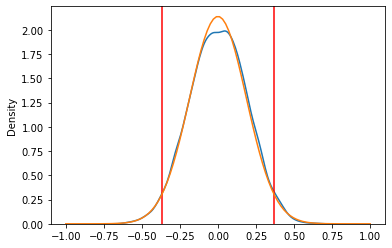

In [25]:
from scipy.stats import norm

#sns.displot(mean_values)
sns.kdeplot(mean_values)
plt.axvline(diff_NO_YES, 0,2,color="#FF0000")
plt.axvline(diff_YES_NO, 0,2,color="#FF0000")
x=np.linspace(-1, 1, 100)
plt.plot( x, norm.pdf(x, 0, np.std(mean_values,ddof=1)))


In [26]:
np.var(mean_values)

0.034784541157748046

Vemos que la probabilidad de que esos datos se hayan conseguido por puro hazar es muy baja, inferior al 5%-

### T-student

El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Tenemos dos hipótesis:
\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]

Empezamos con las siguientes suposiciones:
1. Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población.
2. Las poblaciones siguen una distribución normal. (sino usar test Wilcoxon-Mann-Whitney)
3. Ambas poblaciones tienen la misma varianza. (sino usar test Welch)
4. Las poblaciones no están correladas. (sino usar t-test emparejado)

Primero calculamos la media y varianza de ambos grupos. El test para verificar si la hipótesis nula $H_0$ es cierta puede ser calculado como sigue:

\\[ t=\frac{E[X]-E[Y]}{s_p·\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}} \\]

Donde $s_p$ es la desviación estandar compuesta, calculada como:

\\[ s^2_p=\frac{(n_x-1)Var[X]+(n_y-1)Var[Y]}{n_x+n_y-2} \\]

Donde $n_x$ y $n_y$ son los números de muestras en cada uno de los grupos muestreados. El número de grados de libertad es 
$d.f.=n_x+n_y-2$. Podemos asumir que las dos varianzas son iguales si ambas pasan el test de varianza de Fisher(F-test).


In [27]:
from scipy import stats
t, p = stats.ttest_ind(weight_NO_smoke,weight_YES_smoke)
p


0.046502721823500064

# Ejemplo practico

¿Cuantos caramelos hay en estos grupos?

![](https://github.com/calabozo/orange-stats/raw/master/caramelos.jpg)

# Regresiones lineales

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, diferentes variables independientes definidas en la matriz $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
\hat{Y}=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p = \sum \beta_k X_k
\\]


Tratamos de encontrar la predicción $\hat{Y}$ tal que minimize el error cuadrático medio:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]



![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)


In [28]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(birth_weight,test_size=0.33, random_state=42)

In [29]:
from statsmodels.formula.api import ols

In [30]:
train.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight,Birthweight_kg
15,1600,13,21,6.3,39,0,19,0,64,125,23,14,2,76,0,0,Normal,2.857630
33,27,14,20,7.8,41,1,37,25,63,145,46,16,0,68,0,1,Normal,3.538018
16,57,14,20,7.3,39,1,23,17,62,104,32,12,25,66,0,0,Normal,3.311222
36,1764,15,22,10.0,41,1,32,12,68,154,38,14,25,71,0,0,Normal,4.535920
35,1388,13,20,6.9,41,1,22,7,63,117,24,16,12,69,0,0,Normal,3.129785


In [31]:
model = ols(formula='Birthweight_kg ~ mheight + motherage + fheight + fage + mnocig', data=birth_weight)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Birthweight_kg   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.426
Date:                Thu, 10 Dec 2020   Prob (F-statistic):             0.0124
Time:                        10:59:10   Log-Likelihood:                -29.681
No. Observations:                  42   AIC:                             71.36
Df Residuals:                      36   BIC:                             81.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1471      2.838     -1.461      0.1

In [32]:
model = ols(formula='Birthweight_kg ~ mheight+ mnocig', data=birth_weight)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Birthweight_kg   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     4.362
Date:                Thu, 10 Dec 2020   Prob (F-statistic):             0.0195
Time:                        10:59:10   Log-Likelihood:                -33.616
No. Observations:                  42   AIC:                             73.23
Df Residuals:                      39   BIC:                             78.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7943      2.232     -1.252      0.2

## Clasificación: Regresión logística

En lugar de realizar una predicción de un valor queremos hacer un clasificador.
Podemos tratar de asignar una probabilidad. Pero hay un problema porque la regresión lineal va entre 0 y 1.

Para ello transformarmos la regresión lineal mediante la función logit:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Logit.svg/350px-Logit.svg.png)

#### función de enlace (link function)

Para pasar del dominio de números reales $(-\infty,\infty)$ al de probabilidades $[0,1]$ a vamos a utilizar la **función logística**:
\\[
p = h(x)=  \frac{1}{1+e^{-x}}
\\]
Su inversa se conoce como la función **logit**:
\\[
h^{-1}(p) = log \left( \frac{p}{1-p} \right)
\\]

Es decir, cuando estemos trabajando con una **distribución binomial** un modelo lineal del tipo:
\\[
y = \beta \vec{x}+\beta_0
\\]
lo podemos trasnformar en:
\\[
y = p(x) = \frac{1}{1+e^{-\beta \vec{x}-\beta_0}} 
\\]
Ahora $p(x)$ es una función que muestra valores en el rango $[0,1]$, puede ser considerada como una probabilidad.

Y definiendo un umbral podríamos tener el siguiente clasificador:
* Seleccionamos clase 1 si p(x)>=0.5
* Seleccionamos clase 0 si p(x)< 0.5



Es decir, tenemos una probabilidad, su valor está en el rango $[0,1]$:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}   
\\]

Definimos la razón de monomios (Odds ratio) como el cociente entre dos probabilidades, su valor está en el rango $[0,\infty]$:

\\[
 Odds = \frac{p}{1-p}=\frac{\frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}{\frac{e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}=e^{(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}
\\]

Si aplicamos el logaritmo a la razón de monomios tenemos un valor que está en el rango $[-\infty,\infty]$:
\\[
 log(Odds)= log \left(\frac{p}{1-p} \right) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]

La función de coste que vamos a tratar de minimizar será:
\\[
\begin{split}
Cost(p(x),y) &= {1 \over n} \sum_{i=0}^n{(y-\hat{y})^2}\\
Cost(p(x),y) &= {1 \over n} \sum_{i=0}^n{(y-p(x))^2}
\end{split}
\\]
Que transformaremos en:
\\[
Cost(p(x),y) = -y ·log(p(x))-(1-y)·log(1-p(x))
\\]


### Ejemplo:Churn rate

Vamos a utilizar un dataset publicado por IBM en [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).


En este ejemplo vamos a cargar el dataset proporcionado y ver si somos capaces de ver qué usuarios son los que corren más riesgo de irse.

El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes: la columna se llama Churn
* Servicios para los que se ha registrado cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas
* Información de la cuenta del cliente: cuánto tiempo han sido cliente (columna tenure), contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
* Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes

In [27]:
#df_churn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_churn=pd.read_csv("https://github.com/calabozo/orange-stats/raw/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
df_churn=df_churn.drop(
    columns=["customerID","OnlineSecurity","OnlineBackup",
             "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","TotalCharges"])

In [30]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [35]:
from statsmodels.formula.api import logit
# https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html

In [36]:
df_churn["Churn"].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [37]:
df_churn["Churn"]=df_churn["Churn"].astype('category')
df_churn["Churn_id"]=df_churn["Churn"].cat.codes

In [38]:
from sklearn.model_selection import train_test_split
df_churn_train,df_churn_test = train_test_split(df_churn,test_size=0.33, random_state=42)
df_churn_test=df_churn_test.copy()

In [39]:
churn_model=logit(formula="Churn_id ~ tenure+C(InternetService)+MonthlyCharges+C(PaymentMethod)",
                  data=df_churn_train).fit()
churn_model.summary()

Optimization terminated successfully.
         Current function value: 0.441677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Churn_id   No. Observations:                 4718
Model:                          Logit   Df Residuals:                     4710
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.2335
Time:                        14:52:58   Log-Likelihood:                -2083.8
converged:                       True   LL-Null:                       -2718.5
Covariance Type:            nonrobust   LLR p-value:                6.808e-270
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -0.3861      0.209     -1.852      0.064      -0.795       0.023
C(InternetService)[T.Fiber optic]               1.2640      0.148      8.536      0.000       0.974       1.554
C(InternetService)[T.No]                       -1.1586      0.178     -6.492      0.000      -1.508      -0.809
C(PaymentMethod)[T.Credit card (automatic)]    -0.0454      0.132     -0.343      0.732      -0.305       0.214
C(PaymentMethod)[T.Electronic check]            0.5076      0.110      4.626      0.000       0.293       0.723
C(PaymentMethod)[T.Mailed check]               -0.0996      0.133     -0.750      0.453      -0.360       0.161
tenure                                         -0.0414      0.002    -18.646      0.000      -0.046      -0.037
MonthlyCharges                                 -0.0024      0.004     -0.690      0.490      -0.009       0.004
===============================================================================================================
"""

#### Salida de un modelo

La salida de esta predicción es el logaritmo de la razón de monomios:
\\[
 log(Odds)= log \left(\frac{p}{1-p} \right) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]

In [40]:
user_test = df_churn_test.iloc[5:6,:]

In [41]:
log_odds=churn_model.predict(user_test, linear=True).values[0]

In [42]:
print(f"Es {np.round(np.exp(log_odds),2)} veces más probable que user_test haga Churn que permanezca en la compañia")

Es 0.12 veces más probable que user_test haga Churn que permanezca en la compañia


In [43]:
prob_est = churn_model.predict(user_test, linear=False).values[0]

In [44]:
print(f"""Aunque no se corresponde con la probabilidad teórica, 
una aproximación a la probabilidad de churn para el usuario test rondaría {np.round(prob_est,2)}""")

Aunque no se corresponde con la probabilidad teórica, 
una aproximación a la probabilidad de churn para el usuario test rondaría 0.1


In [45]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

prob_est == sigmoid(log_odds)

True

#### Medidas de calidad de un modelo

Aqui lo que tenemos es un clasificador con dos hipótesis $H_0$ y $H_1$. 
Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

|.|Elegimos $H_0$|Elegimos $H_1$|
|-|-|-|
|$H_0$ cierta| No hay error | falso positivo|
|$H_1$ cierta| falso negativo| No hay error |

La matriz de confusión lo que hace es contar el número de ocurrencias que ha habido en cada celda.

In [63]:
cnf_mat=pd.crosstab(columns=df_churn_test["Churn"],index=churn_model.predict(df_churn_test)>0.5 )
cnf_mat

Churn,No,Yes
row_0,,
False,1552,324
True,145,304


In [64]:
df_churn_test["pred"]=churn_model.predict(df_churn_test)>0.5
df_churn_test["pred"] = df_churn_test["pred"].replace({True: 'Yes', False: 'No'})
df_churn_test=df_churn_test.dropna(subset=["Churn"])

In [66]:
from sklearn.metrics import confusion_matrix
M=confusion_matrix(df_churn_test["Churn"], df_churn_test["pred"], labels=["No","Yes"] )
M

array([[1552,  145],
       [ 324,  304]])

**Precisión** : $\frac{M_{11}}{M_{01}+M_{11}}$. Cuantos aciertos tengo del total de predicciones.

**Exhaustividad** (recall, true positive): $\frac{M_{11}}{M_{10}+M_{11}}$. Que ratio de los casos positivos soy capaz de encontrar.

**Prob Falso positivo** (false positive rate): $\frac{M_{01}}{M_{00}+M_{01}}$. Que ratio de los casos positivos soy capaz de encontrar.

**Exactitud** (Accuracy): $\frac{M_{11}+M_{22}}{M_{11}+M_{12}+M_{21}+M_{22}}$: Cuantas predicciones correctas he hecho.

**Valor-F**: $F_\beta=(1+\beta^2)\frac{Precisión·Exhaustividad}{\beta^2·Precisión+Exhaustividad}$

In [217]:
# Precision or positive predictive value
PPV = M[1,1]/np.sum(M[:,1])
print(f"Precision: {PPV}")

Precision: 0.6770601336302895


In [218]:
# Sensitivity, hit rate, recall, or true positive rate
TPR=M[1,1]/np.sum(M[1,:])
print(f"Recall o True Positive Rate: {TPR}")

Recall o True Positive Rate: 0.4840764331210191


In [219]:
# False positive rate
FPR = M[0,1]/np.sum(M[0,:])
print(f"False Positive Rate: {FPR}")

False Positive Rate: 0.0854449027695934


In [220]:
# Overall accuracy
ACC = (M[0,0]+M[1,1])/np.sum(M.ravel())
print(f"Accuracy: {ACC}")

Accuracy: 0.7982795698924732


In [221]:
# Overall accuracy
Bt=1
ValorF = (1+Bt**2)*PPV*TPR/((Bt**2)*PPV+TPR)
print(f"ValorF: {ValorF}")

ValorF: 0.5645311049210772


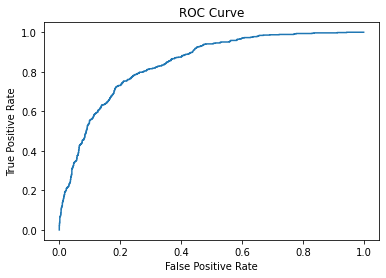

In [222]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_churn_test["Churn"]=="Yes", churn_model.predict(df_churn_test, linear=False))
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [223]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(df_churn_test["Churn"], churn_model.predict(df_churn_test))

0.8424026663764079

**Como se calcula la ROC**

In [224]:
df_small_test=df_churn_test.copy()
df_small_test["pred"]=churn_model.predict(df_churn_test, linear=False)
df_small_test=df_small_test[["Churn","pred"]].sort_values(by="pred").reset_index(drop=True)
df_small_test["Pred_Churn"]=(df_small_test["pred"]>=0.5020861589375786).replace({True: 'Yes', False: 'No'})
#df_small_test

In [225]:
cnf_mat=confusion_matrix(df_small_test["Churn"], df_small_test["Pred_Churn"], labels=["No","Yes"] )
cnf_mat
TPR = cnf_mat[1,1]/np.sum(cnf_mat[1,:])
FPR = cnf_mat[0,1]/np.sum(cnf_mat[:,1])


In [226]:
cnf_mat

array([[1554,  143],
       [ 325,  303]])

In [229]:
idx=200
thresholds[idx]
print(tpr[idx])
print(fpr[idx])

0.482484076433121
0.08426635238656452


In [230]:
143/(1554+143)
cnf_mat[0,1]/np.sum(cnf_mat[0,:])

0.08426635238656452

In [231]:
all_TPR=[]
all_FPR=[]

In [232]:
for th in np.linspace(0,1,20):
    df_small_test["Pred_Churn"]=(df_small_test["pred"]>th).replace({True: 'Yes', False: 'No'})
    cnf_mat=confusion_matrix(df_small_test["Churn"], df_small_test["Pred_Churn"], labels=["No","Yes"] )
    TPR = cnf_mat[1,1]/np.sum(cnf_mat[1,:]) 
    
    FPR = cnf_mat[0,1]/np.sum(cnf_mat[0,:])
    
    all_FPR.append(FPR)
    all_TPR.append(TPR)
(TPR,FPR)

(0.0, 0.0)

In [233]:
#df_small_test

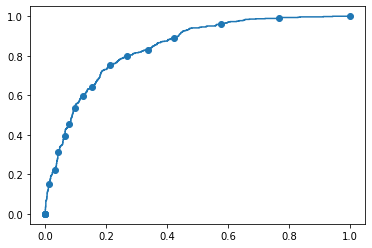

In [234]:
plt.scatter(all_FPR,all_TPR)
plt.plot(fpr, tpr)

#### Mejorando la calidad del modelo

In [54]:
df_payment=pd.crosstab(index=df_churn_train["Churn"],columns=df_churn_train["PaymentMethod"])
df_payment


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,866,855,891,865
Yes,179,157,704,201


In [55]:
from scipy import stats
from statsmodels.stats.proportion import proportion_confint

In [56]:
proportion_confint(3, nobs=15, method='binom_test')

(0.056846867590246805, 0.4657222213498857)

In [57]:
df_payment.apply(lambda x:proportion_confint(x[0],nobs=x[0]+x[1],method='binom_test'))

PaymentMethod
Bank transfer (automatic)    (0.8043989682028564, 0.8508284713881769)
Credit card (automatic)       (0.821239099727908, 0.8662205018841802)
Electronic check             (0.5338623831408056, 0.5830881151248672)
Mailed check                 (0.7866683377891794, 0.8340532256476413)
dtype: object

In [58]:
df_churn["ElectronicCheck"]=df_churn.PaymentMethod=="Electronic check"

In [59]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Churn_id,ElectronicCheck
0,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,No,0,True
1,Male,0,No,No,34,Yes,No,DSL,One year,No,Mailed check,56.95,No,0,False
2,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,Yes,1,False
3,Male,0,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,No,0,False
4,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes,1,True


In [60]:
df_churn_train,df_churn_test = train_test_split(df_churn,test_size=0.33, random_state=42)

In [61]:
churn_new_model=logit(formula="Churn_id ~ tenure+C(InternetService)+C(PaperlessBilling)+C(Contract)+MonthlyCharges+C(ElectronicCheck)+C(SeniorCitizen)",
                  data=df_churn_train).fit()
churn_new_model.summary()

Optimization terminated successfully.
         Current function value: 0.428247
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Churn_id   No. Observations:                 4718
Model:                          Logit   Df Residuals:                     4708
Method:                           MLE   Df Model:                            9
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.2568
Time:                        10:59:14   Log-Likelihood:                -2020.5
converged:                       True   LL-Null:                       -2718.5
Covariance Type:            nonrobust   LLR p-value:                5.225e-295
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8816      0.196     -4.487      0.000      -1.267      -0.496
C(InternetService)[T.Fiber optic]     0.8387      0.155      5.397      0.000       0.534       1.143
C(InternetService)[T.No]             -0.7286      0.182     -3.995      0.000      -1.086      -0.371
C(PaperlessBilling)[T.Yes]            0.3627      0.088      4.106      0.000       0.190       0.536
C(Contract)[T.One year]              -0.7315      0.124     -5.900      0.000      -0.974      -0.488
C(Contract)[T.Two year]              -1.6594      0.213     -7.807      0.000      -2.076      -1.243
C(ElectronicCheck)[T.True]            0.4195      0.082      5.101      0.000       0.258       0.581
C(SeniorCitizen)[T.1]                 0.2766      0.100      2.777      0.005       0.081       0.472
tenure                               -0.0296      0.003    -11.755      0.000      -0.035      -0.025
MonthlyCharges                        0.0029      0.004      0.793      0.427      -0.004       0.010
=====================================================================================================
"""

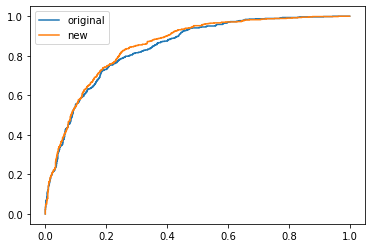

In [65]:
fpr_new, tpr_new, thresholds_new = roc_curve(df_churn_test["Churn"]=="Yes", churn_new_model.predict(df_churn_test))
plt.plot(fpr, tpr,label='original')
plt.plot(fpr_new, tpr_new,label='new')
plt.legend()